In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\rahul\\Downloads\\test water\\water_potability.csv")
df.head()

Station Code                   LOCATION            STATE Temp Min Temp Max  \
0          1001            BEASATU/SMANALI  HIMACHALPRADESH        2       13   
1          4444  RIVERBEASD/SOFWPFATMANALI  HIMACHALPRADESH        8       14   
2          4037  RIVERBEASD/SMANALSUNALLAH  HIMACHALPRADESH        2       13   
3          2601            BEASATD/SMANALI  HIMACHALPRADESH        3       14   
4          2602             BEASATU/SKULLU  HIMACHALPRADESH        5       15   

   Temperature Do Min  Do Max  Dissolved Oxygen  pH Min  ...  Ni Min  Ni Max  \
0          8.0    8.7    11.2              10.0     7.3  ...     0.2    0.31   
1         11.0    8.5    10.8               9.7     7.3  ...     0.2     0.2   
2          8.0    8.9    10.9               9.9     7.0  ...     0.1     0.1   
3          9.0    8.2    11.1               9.7     6.9  ...     0.1     0.4   
4         10.0    7.6    11.5               9.6     7.0  ...     0.1     0.2   

  Nitrate FC Min  FC Max Faecal Coliform TC Min  TC Max Total Coliform  \
0    0.26   12.0    33.0            23.0  120.0   240.0          180.0   
1    0.20   31.0    94.0            63.0  280.0   540.0          410.0   
2    0.10   20.0    32.0            26.0  120.0   280.0          200.0   
3    0.30   25.0   170.0            98.0  280.0   920.0          600.0   
4    0.20   25.0    70.0            48.0  220.0   540.0          380.0   

  Potability  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 28 columns]

In [4]:
df.columns

Index(['Station Code', 'LOCATION', 'STATE', 'Temp Min', 'Temp Max',
       'Temperature', 'Do Min', 'Do Max', 'Dissolved Oxygen', 'pH Min',
       'pH Max', 'pH', 'Con Min', 'Con Max', 'Conductivity', 'BCOD Min',
       'BCOD Max', 'Bio Chemical Oxygen Demand', 'Ni Min', 'Ni Max', 'Nitrate',
       'FC Min', 'FC Max', 'Faecal Coliform', 'TC Min', 'TC Max',
       'Total Coliform', 'Potability'],
      dtype='object')

In [5]:
df.describe()

Station Code  Temperature       Do Max  Dissolved Oxygen       pH Min  \
count   1043.000000  1020.000000  1026.000000       1026.000000  1042.000000   
mean    3200.860019    25.971863     8.147563          7.020526     7.230384   
std     3698.880617    75.992629     1.646481          1.545760     0.455942   
min        1.000000     6.000000     0.100000          0.100000     2.200000   
25%     1365.500000    21.725000     7.300000          6.300000     7.000000   
50%     2491.000000    25.000000     8.100000          7.100000     7.200000   
75%     3566.500000    27.000000     9.175000          8.000000     7.500000   
max    30085.000000  2445.000000    16.900000         11.000000     8.600000   

            pH Max           pH  Conductivity  Bio Chemical Oxygen Demand  \
count  1042.000000  1042.000000    986.000000                 1015.000000   
mean      8.175182     7.739098    906.684584                    4.593596   
std       0.405305     0.358877   3014.946961                    9.852335   
min       6.700000     5.400000     32.000000                    0.100000   
25%       7.900000     7.500000    236.000000                    1.300000   
50%       8.200000     7.800000    373.500000                    2.100000   
75%       8.500000     8.000000    598.750000                    3.900000   
max       9.900000     8.700000  38514.000000                  124.000000   

          Nitrate        FC Min        FC Max  Faecal Coliform        TC Min  \
count  884.000000  9.140000e+02  9.140000e+02     9.140000e+02  9.260000e+02   
mean     1.861960  5.826939e+03  1.256167e+05     6.572191e+04  1.547860e+04   
std      3.450213  1.106736e+05  1.754927e+06     8.912814e+05  3.099713e+05   
min      0.090000  3.000000e-01  1.800000e+00     1.800000e+00  1.000000e+00   
25%      0.500000  2.000000e+00  3.900000e+01     2.300000e+01  4.900000e+01   
50%      0.900000  3.450000e+01  4.900000e+02     3.000000e+02  2.400000e+02   
75%      1.977500  4.000000e+02  4.075000e+03     2.630000e+03  1.400000e+03   
max     40.900000  3.300000e+06  4.900000e+07     2.461000e+07  9.400000e+06   

             TC Max  Total Coliform   Potability  
count  9.320000e+02    9.320000e+02  1043.000000  
mean   2.631729e+05    1.392765e+05     0.327900  
std    3.563436e+06    1.806874e+06     0.469673  
min    2.000000e+00    2.000000e+00     0.000000  
25%    2.800000e+02    1.800000e+02     0.000000  
50%    1.700000e+03    1.065000e+03     0.000000  
75%    1.300000e+04    7.837500e+03     1.000000  
max    9.200000e+07    4.600175e+07     1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Station Code                1043 non-null   int64  
 1   LOCATION                    1043 non-null   object 
 2   STATE                       1043 non-null   object 
 3   Temp Min                    1032 non-null   object 
 4   Temp Max                    1032 non-null   object 
 5   Temperature                 1020 non-null   float64
 6   Do Min                      1026 non-null   object 
 7   Do Max                      1026 non-null   float64
 8   Dissolved Oxygen            1026 non-null   float64
 9   pH Min                      1042 non-null   float64
 10  pH Max                      1042 non-null   float64
 11  pH                          1042 non-null   float64
 12  Con Min                     987 non-null    object 
 13  Con Max                     989 n

In [7]:
df.isnull().sum()

Station Code                    0
LOCATION                        0
STATE                           0
Temp Min                       11
Temp Max                       11
Temperature                    23
Do Min                         17
Do Max                         17
Dissolved Oxygen               17
pH Min                          1
pH Max                          1
pH                              1
Con Min                        56
Con Max                        54
Conductivity                   57
BCOD Min                       25
BCOD Max                       25
Bio Chemical Oxygen Demand     28
Ni Min                        155
Ni Max                        155
Nitrate                       159
FC Min                        129
FC Max                        129
Faecal Coliform               129
TC Min                        117
TC Max                        111
Total Coliform                111
Potability                      0
dtype: int64

<AxesSubplot:>

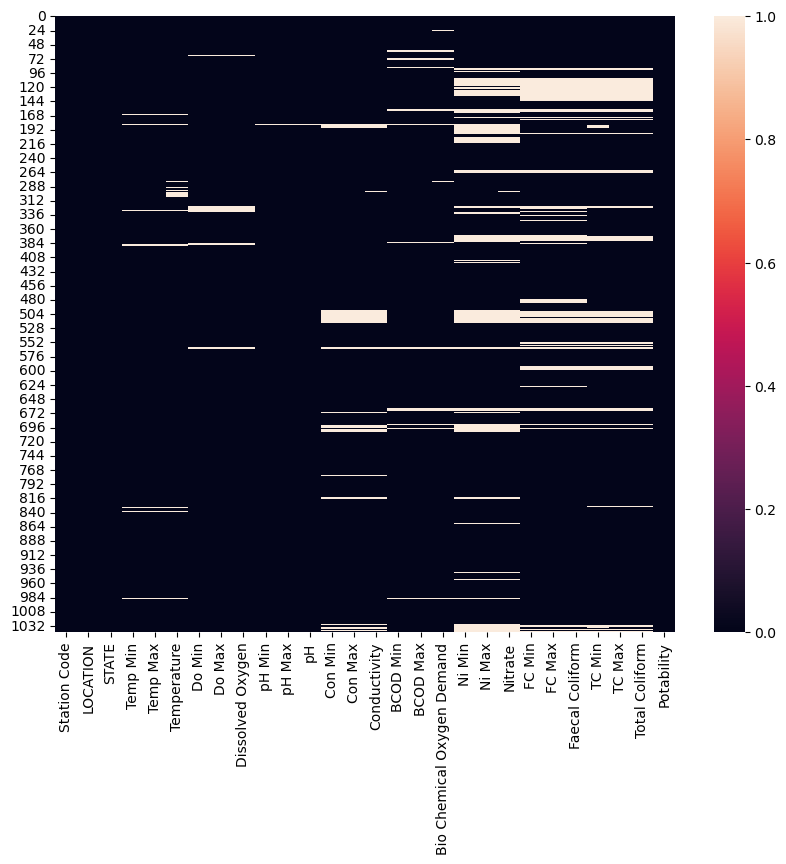

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

<AxesSubplot:>

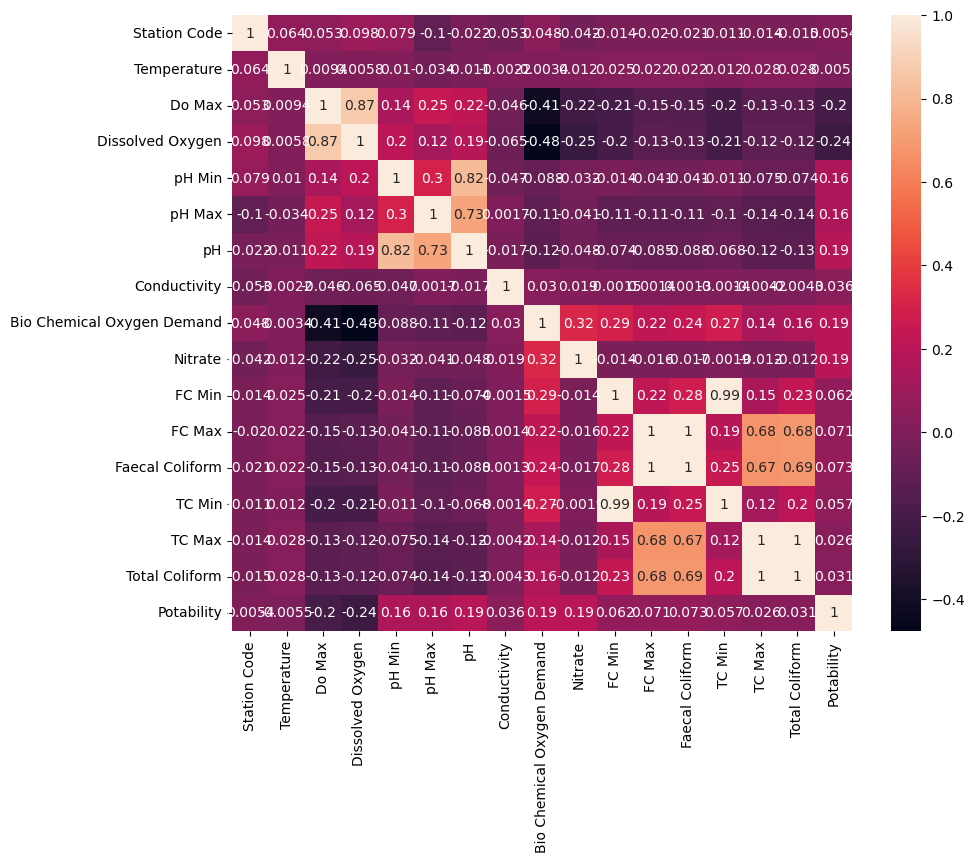

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='pH', ylabel='count'>

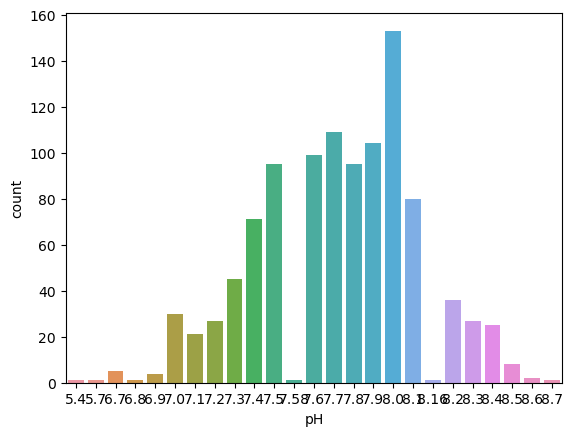

In [10]:
sns.countplot(x="pH",data=df)

In [11]:
df["pH"].value_counts()

8.00    153
7.70    109
7.90    104
7.60     99
7.80     95
7.50     95
8.10     80
7.40     71
7.30     45
8.20     36
7.00     30
7.20     27
8.30     27
8.40     25
7.10     21
8.50      8
6.70      5
6.90      4
8.60      2
5.40      1
8.70      1
5.70      1
6.80      1
8.16      1
7.58      1
Name: pH, dtype: int64

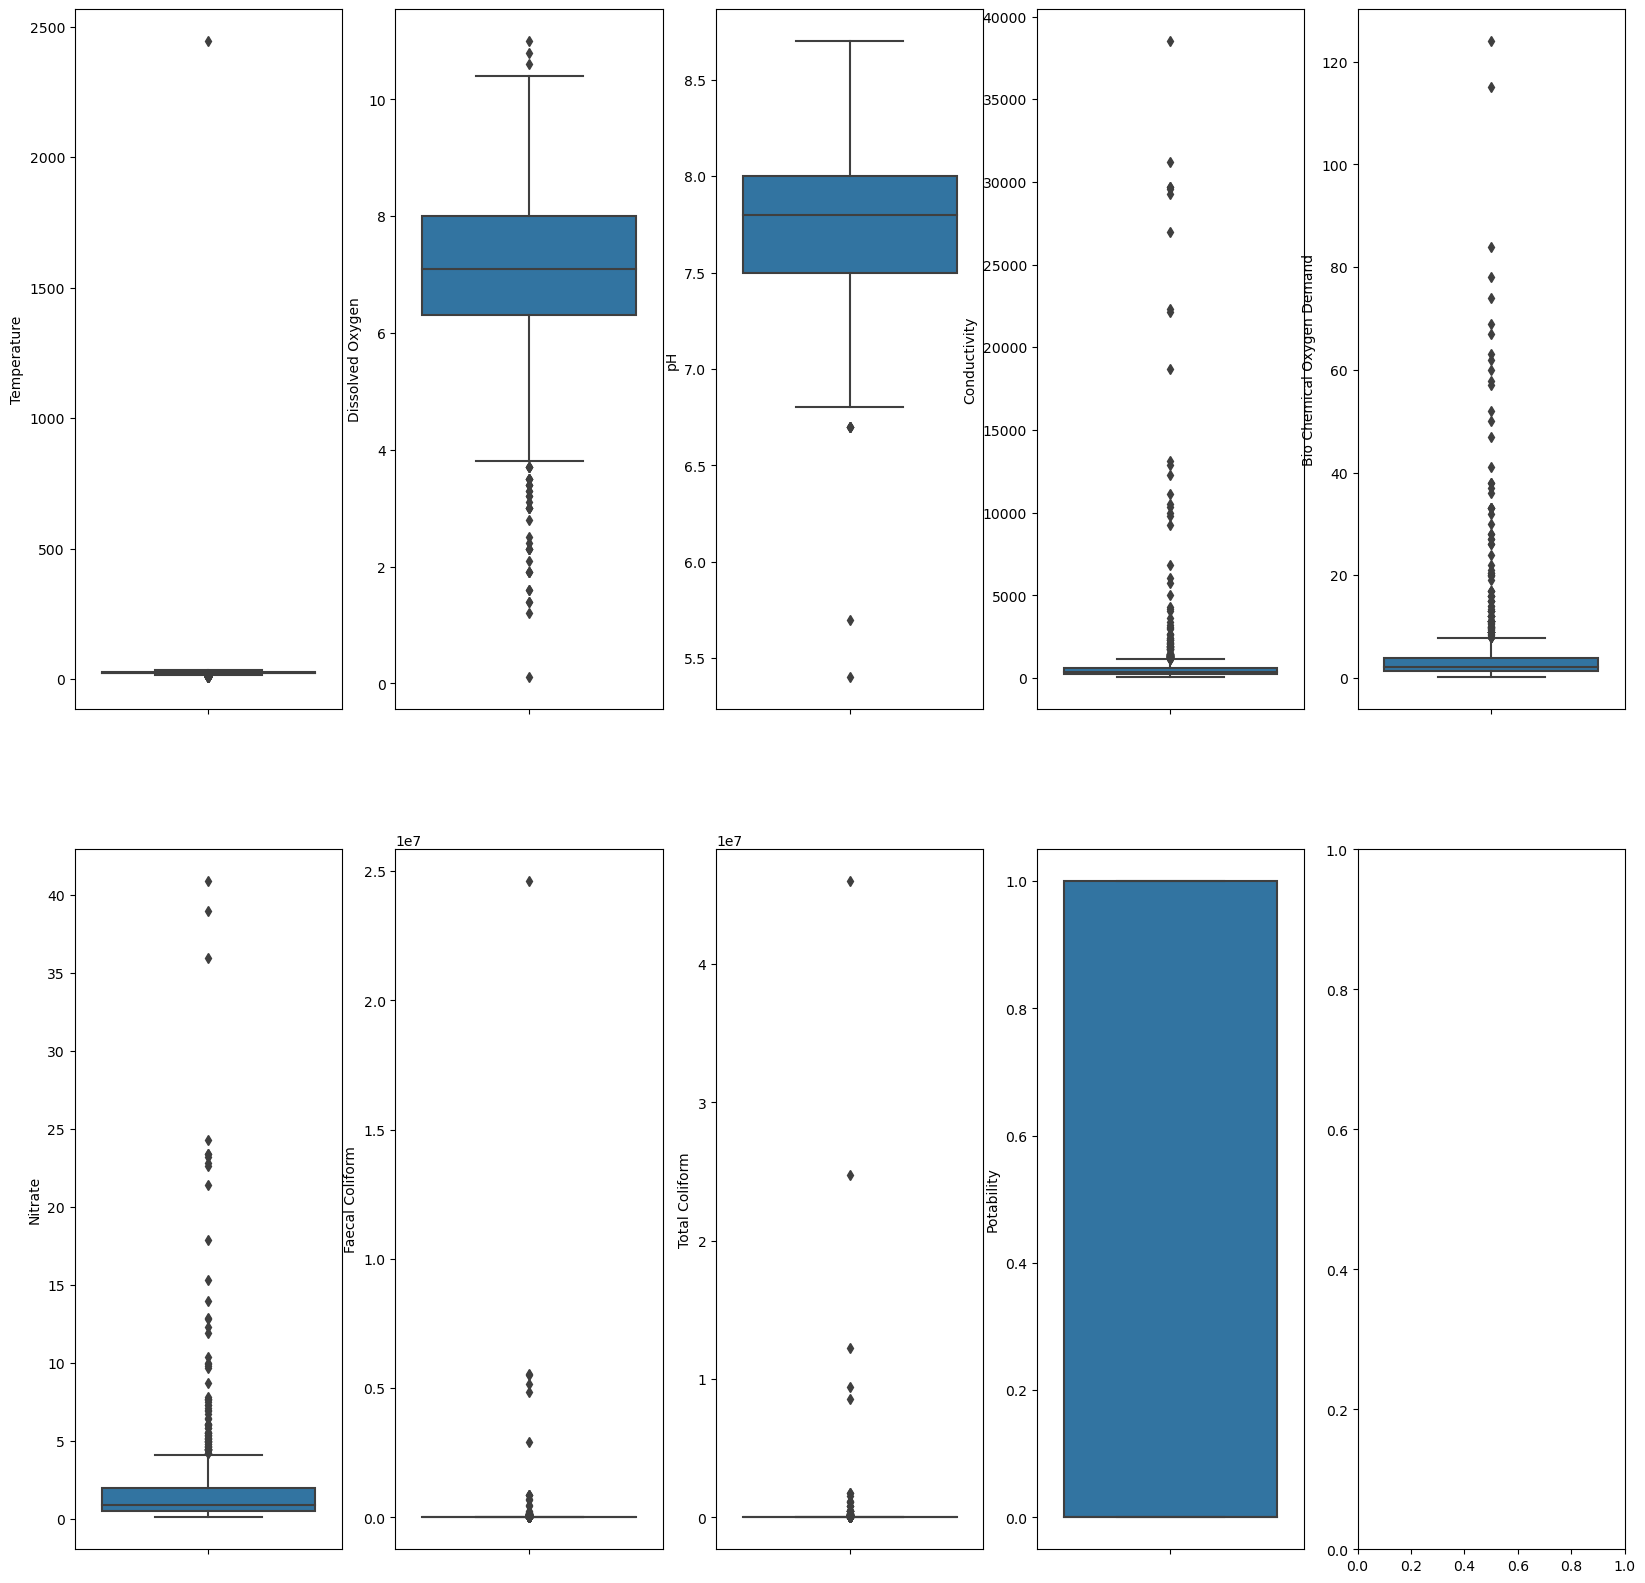

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
ref=df.drop(['Station Code','Temp Max','Temp Min','Do Max','Do Min','pH Max','pH Min','BCOD Max','BCOD Min','Ni Max','Ni Min','FC Max','FC Min','TC Max','TC Min','Con Max','Con Min','LOCATION','STATE'],axis=1)
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 20))

index = 0

ax = ax.flatten()

for col, value in ref.items():
    sns.boxplot(y=col, data=ref, ax=ax[index])
    index += 1


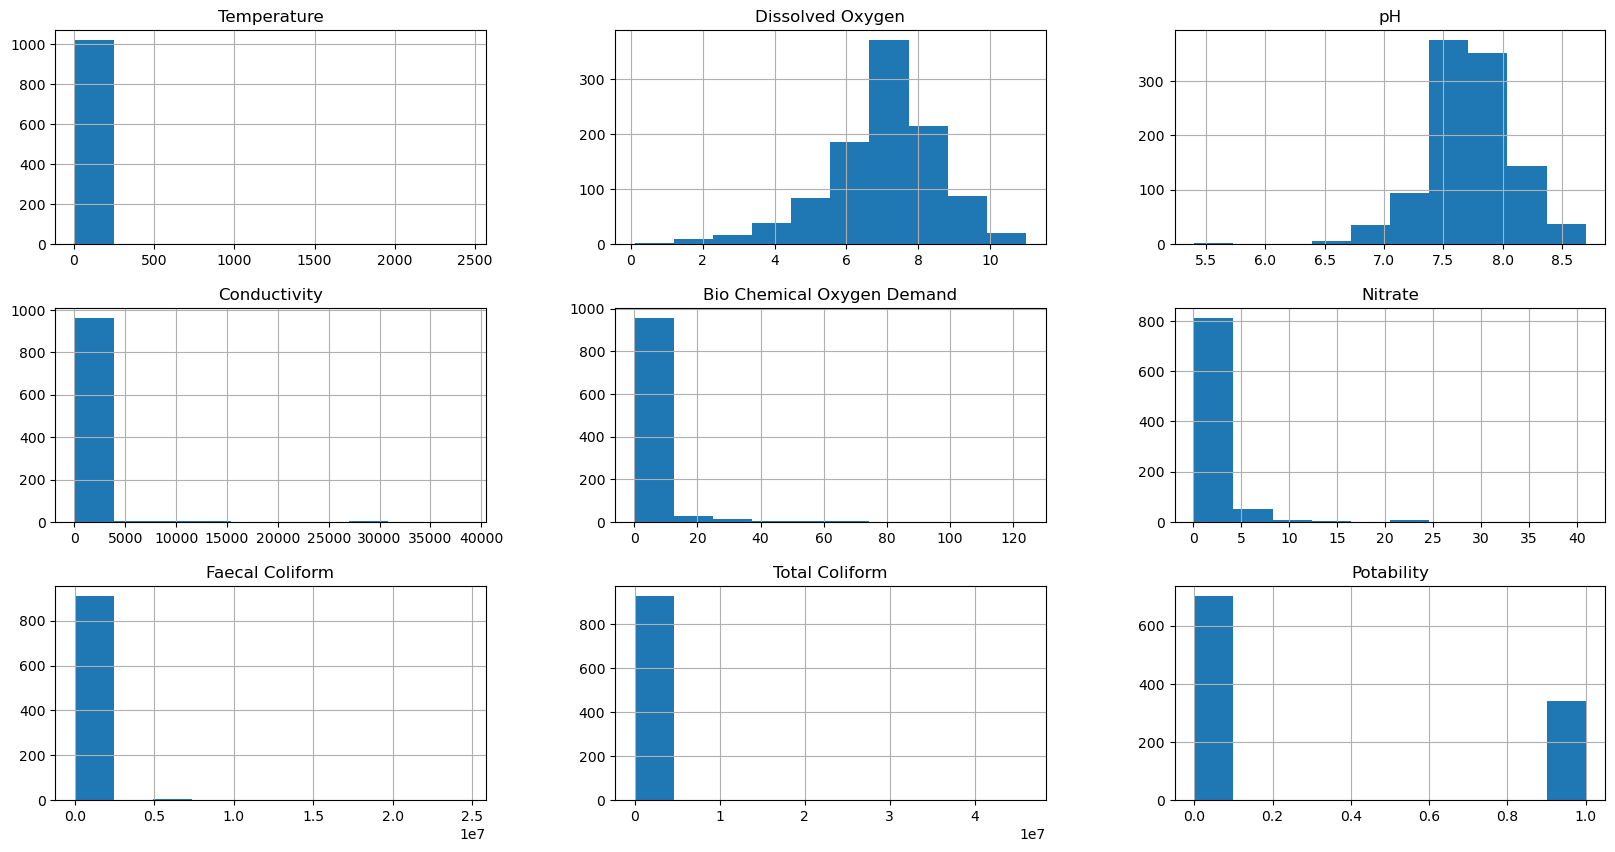

In [13]:
plt.rcParams['figure.figsize'] = [20,10]
ref.hist()
plt.show()

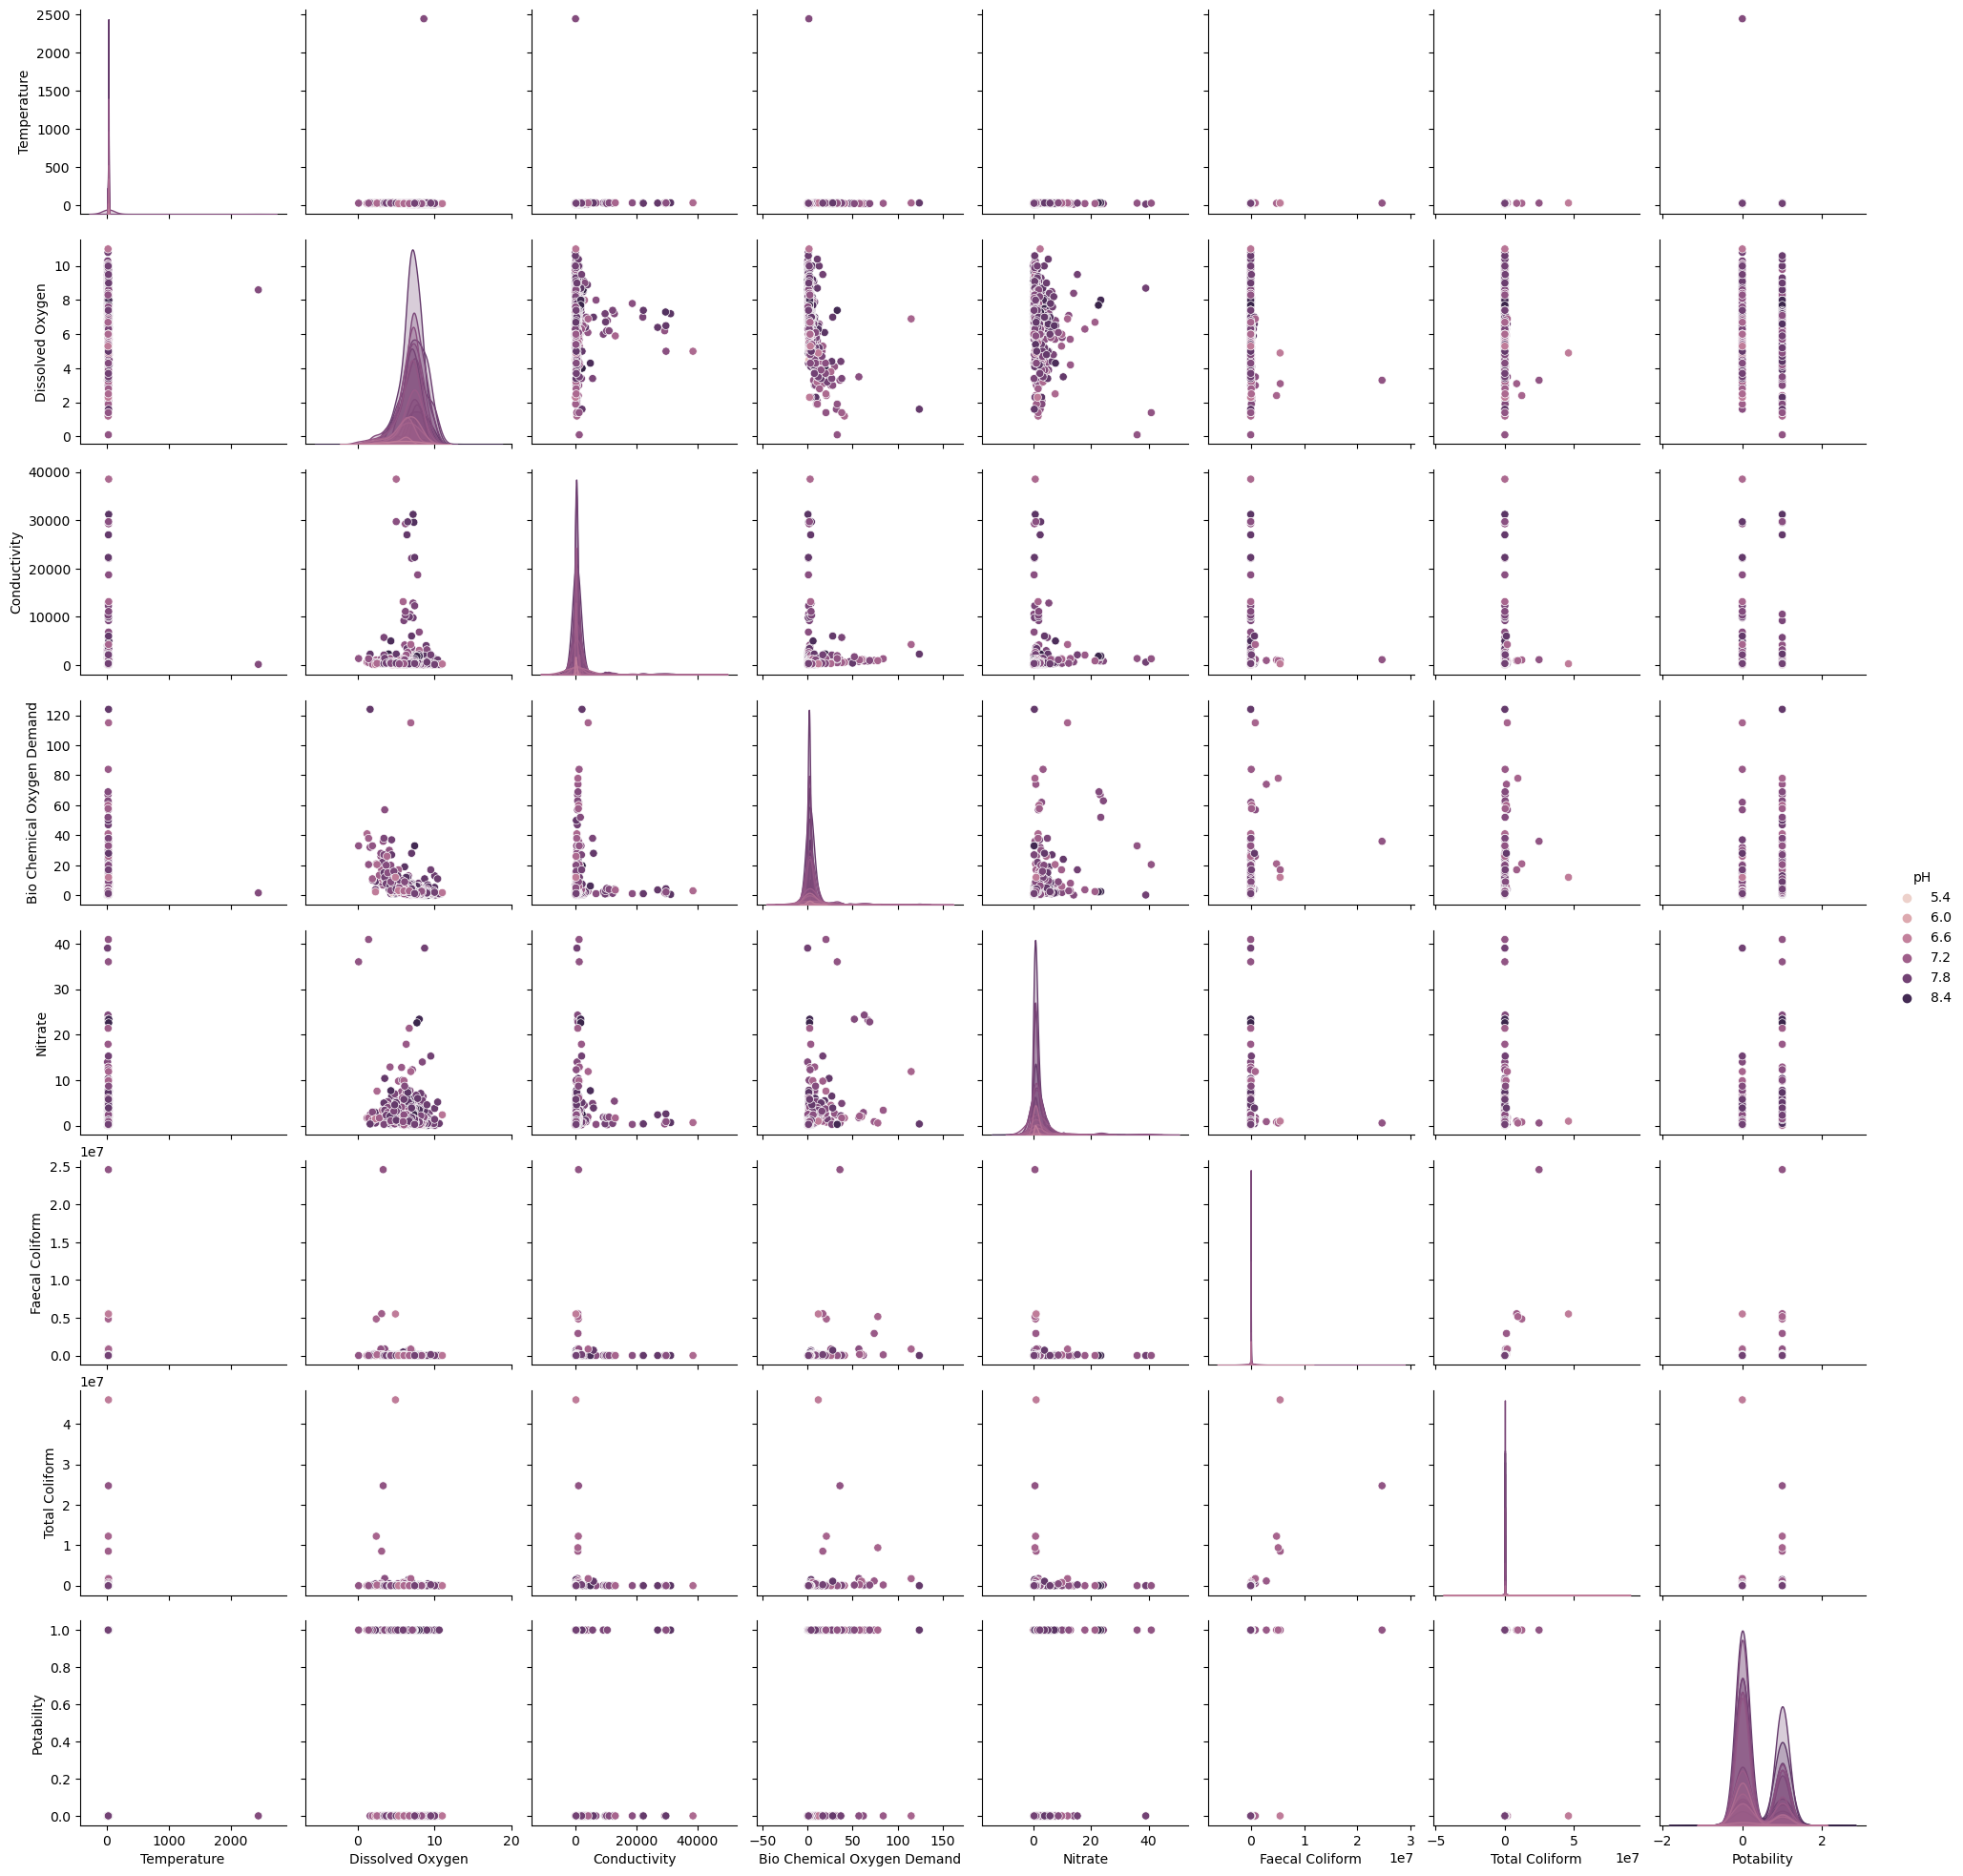

In [14]:
sns.pairplot(ref, hue="pH")

In [15]:
fig = px.pie(ref,names = "pH",hole = 0.2,template = "plotly_dark")
fig.show()

In [101]:
fig = px.scatter (ref, x = "pH", y = "Dissolved Oxygen", color = "Potability", template = "plotly_dark")
fig.show ()

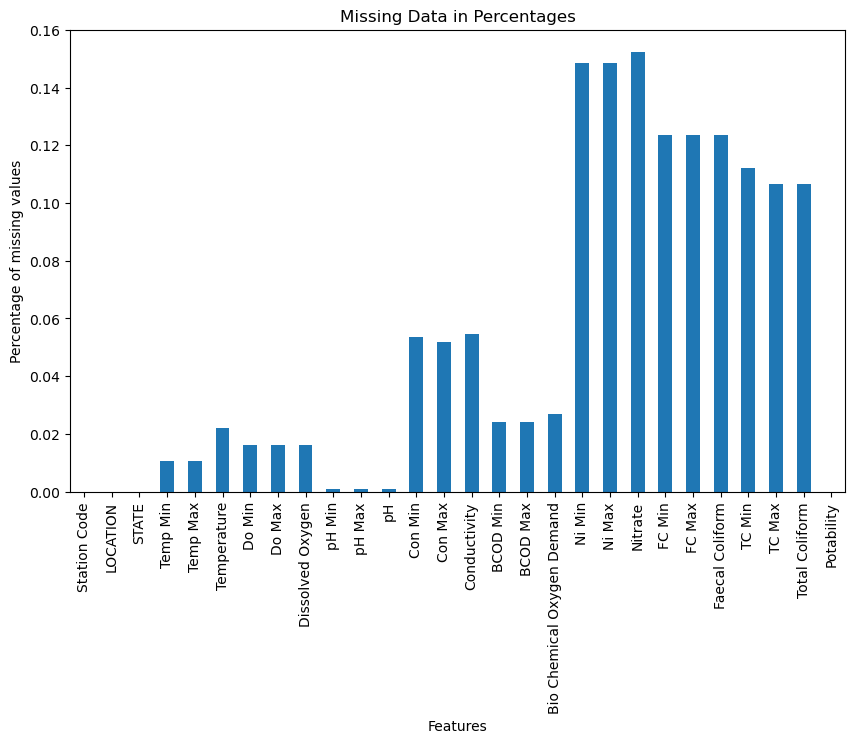

In [17]:
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages');


In [18]:
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Nitrate'] = df['Nitrate'].fillna(df['Nitrate'].mean())
df['Faecal Coliform'] = df['Faecal Coliform'].fillna(df['Faecal Coliform'].mean())
df['Total Coliform'] = df['Total Coliform'].fillna(df['Total Coliform'].mean())
df['Conductivity'] = df['Conductivity'].fillna(df['Conductivity'].mean())
df['Bio Chemical Oxygen Demand'] = df['Bio Chemical Oxygen Demand'].fillna(df['Bio Chemical Oxygen Demand'].mean())
df['Dissolved Oxygen'] = df['Dissolved Oxygen'].fillna(df['Dissolved Oxygen'].mean())

In [19]:
df.isnull().sum()

Station Code                    0
LOCATION                        0
STATE                           0
Temp Min                       11
Temp Max                       11
Temperature                     0
Do Min                         17
Do Max                         17
Dissolved Oxygen                0
pH Min                          1
pH Max                          1
pH                              0
Con Min                        56
Con Max                        54
Conductivity                    0
BCOD Min                       25
BCOD Max                       25
Bio Chemical Oxygen Demand      0
Ni Min                        155
Ni Max                        155
Nitrate                         0
FC Min                        129
FC Max                        129
Faecal Coliform                 0
TC Min                        117
TC Max                        111
Total Coliform                  0
Potability                      0
dtype: int64

In [20]:
df.head()

Station Code                   LOCATION            STATE Temp Min Temp Max  \
0          1001            BEASATU/SMANALI  HIMACHALPRADESH        2       13   
1          4444  RIVERBEASD/SOFWPFATMANALI  HIMACHALPRADESH        8       14   
2          4037  RIVERBEASD/SMANALSUNALLAH  HIMACHALPRADESH        2       13   
3          2601            BEASATD/SMANALI  HIMACHALPRADESH        3       14   
4          2602             BEASATU/SKULLU  HIMACHALPRADESH        5       15   

   Temperature Do Min  Do Max  Dissolved Oxygen  pH Min  ...  Ni Min  Ni Max  \
0          8.0    8.7    11.2              10.0     7.3  ...     0.2    0.31   
1         11.0    8.5    10.8               9.7     7.3  ...     0.2     0.2   
2          8.0    8.9    10.9               9.9     7.0  ...     0.1     0.1   
3          9.0    8.2    11.1               9.7     6.9  ...     0.1     0.4   
4         10.0    7.6    11.5               9.6     7.0  ...     0.1     0.2   

  Nitrate FC Min  FC Max Faecal Coliform TC Min  TC Max Total Coliform  \
0    0.26   12.0    33.0            23.0  120.0   240.0          180.0   
1    0.20   31.0    94.0            63.0  280.0   540.0          410.0   
2    0.10   20.0    32.0            26.0  120.0   280.0          200.0   
3    0.30   25.0   170.0            98.0  280.0   920.0          600.0   
4    0.20   25.0    70.0            48.0  220.0   540.0          380.0   

  Potability  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 28 columns]

<AxesSubplot:>

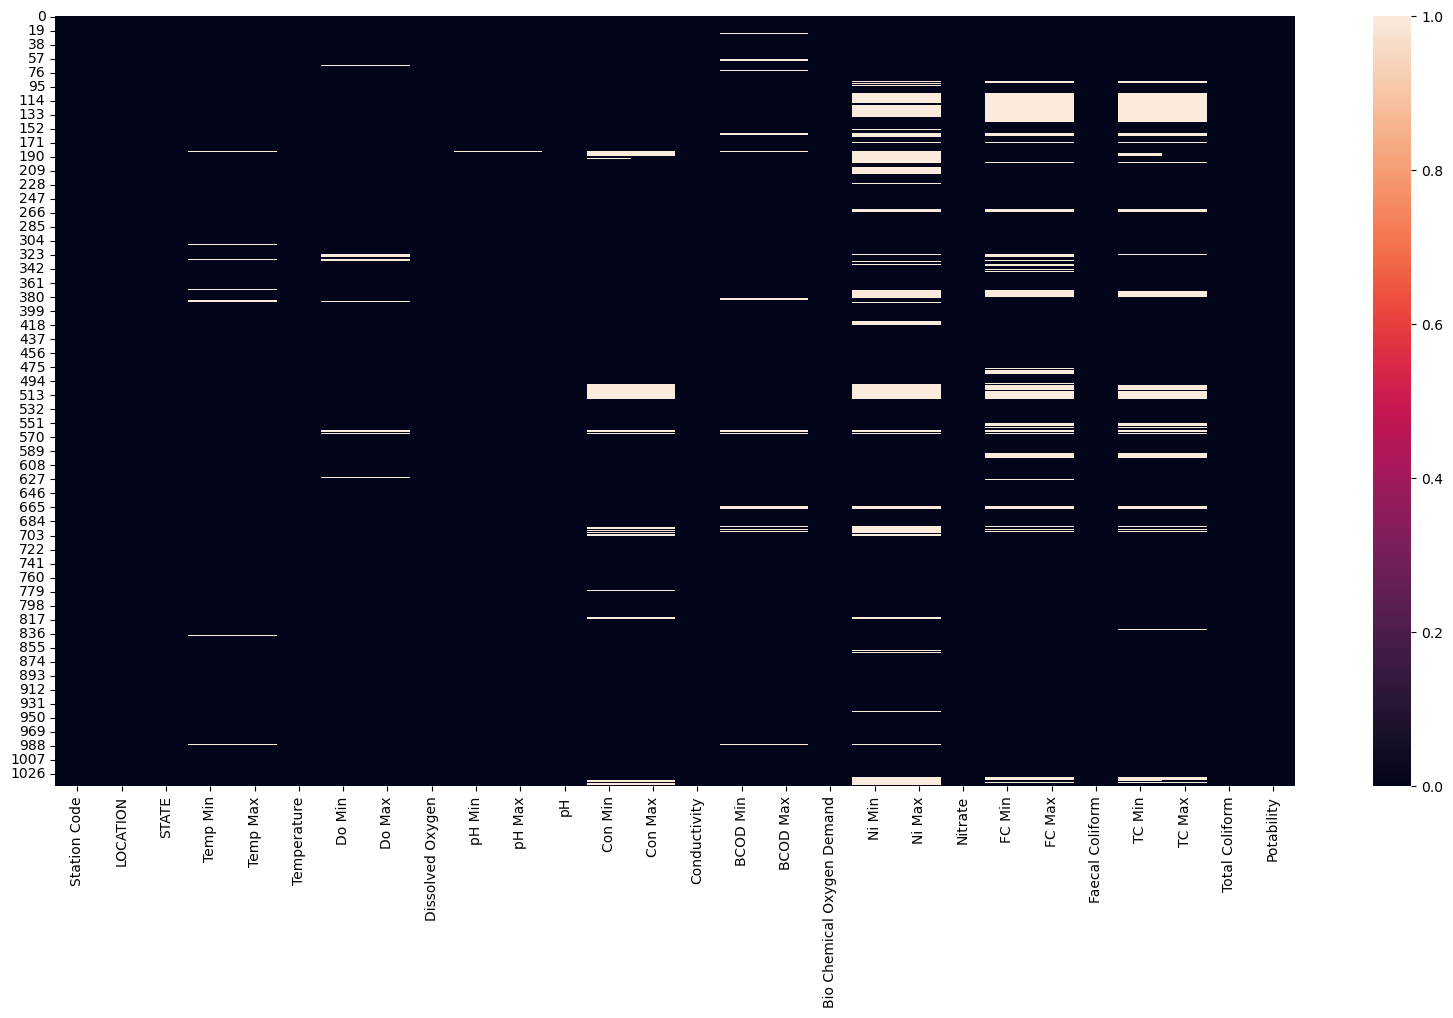

In [21]:
sns.heatmap(df.isnull())

In [22]:
#data_encoded = pd.get_dummies(df, columns=['Station Code','Temp Max','Temp Min','Do Max','Do Min','pH Max','pH Min','BCOD Max','BCOD Min','Ni Max','Ni Min','FC Max','FC Min','TC Max','TC Min','Con Max','Con Min','LOCATION','STATE'])
#data_encoded['pH'] = data_encoded['pH'].apply(lambda x: 1 if x > 50 else 0)
# Drop any rows with NaN value
from sklearn import preprocessing
temp=df.drop(['Station Code','Temp Max','Temp Min','Do Max','Do Min','pH Max','pH Min','BCOD Max','BCOD Min','Ni Max','Ni Min','FC Max','FC Min','TC Max','TC Min','Con Max','Con Min','LOCATION','STATE'],axis=1)
temp.dropna(inplace=True)
x = temp.drop('Potability',axis=1)
y = np.where(temp['Conductivity'].shift(-1) > temp['Total Coliform'], 1, -1)
#lab = preprocessing.LabelEncoder()
#yt = temp['pH']
#y = lab.fit_transform(yt)
x

Temperature  Dissolved Oxygen   pH  Conductivity  \
0             8.0              10.0  7.9    135.000000   
1            11.0               9.7  7.7     77.000000   
2             8.0               9.9  7.7    102.000000   
3             9.0               9.7  7.6    148.000000   
4            10.0               9.6  7.8    106.000000   
...           ...               ...  ...           ...   
1038         28.0               7.5  7.5    230.000000   
1039         18.0               8.4  7.4    906.684584   
1040         20.0               8.3  7.4    906.684584   
1041         24.0               7.6  7.5    165.000000   
1042         24.0               7.4  7.8    341.000000   

      Bio Chemical Oxygen Demand  Nitrate  Faecal Coliform  Total Coliform  
0                            0.2  0.26000        23.000000      180.000000  
1                            0.5  0.20000        63.000000      410.000000  
2                            1.0  0.10000        26.000000      200.000000  
3                            0.4  0.30000        98.000000      600.000000  
4                            0.3  0.20000        48.000000      380.000000  
...                          ...      ...              ...             ...  
1038                         0.5  1.86196     65721.906455   139276.480687  
1039                         2.1  1.86196       185.000000      975.000000  
1040                         2.7  1.86196       145.000000      840.000000  
1041                         0.6  1.86196     65721.906455   139276.480687  
1042                         1.2  0.30000       860.000000     1880.000000  

[1043 rows x 8 columns]

In [23]:
x.shape , y.shape
y

array([-1, -1, -1, ..., -1, -1, -1])

In [24]:
#scaler = StandardScaler()
#x = scaler.fit_transform(x)
#x

In [25]:

from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
x_train.shape , x_test.shape

((834, 8), (209, 8))

In [27]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train_scaled = imputer.fit_transform(x_train_scaled)
x_test_scaled = imputer.transform(x_test_scaled)

In [28]:
svm = SVC(kernel='linear', gamma=0.1)
svm.fit(x_train_scaled, y_train)
svm_pred = svm.predict(x_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred, average='weighted', zero_division=0)
#svm_rec = recall_score(y_test, svm_pred, average='weighted')
#svm_f1 = f1_score(y_test, svm_pred, average='weighted')
print('SVM Accuracy:', svm_acc)
print('SVM Precision:', svm_prec)
#print('SVM Recall:', svm_rec)
#print('SVM F1 Score:', svm_f1)

SVM Accuracy: 0.6602870813397129
SVM Precision: 0.7275298958467274


<AxesSubplot:>

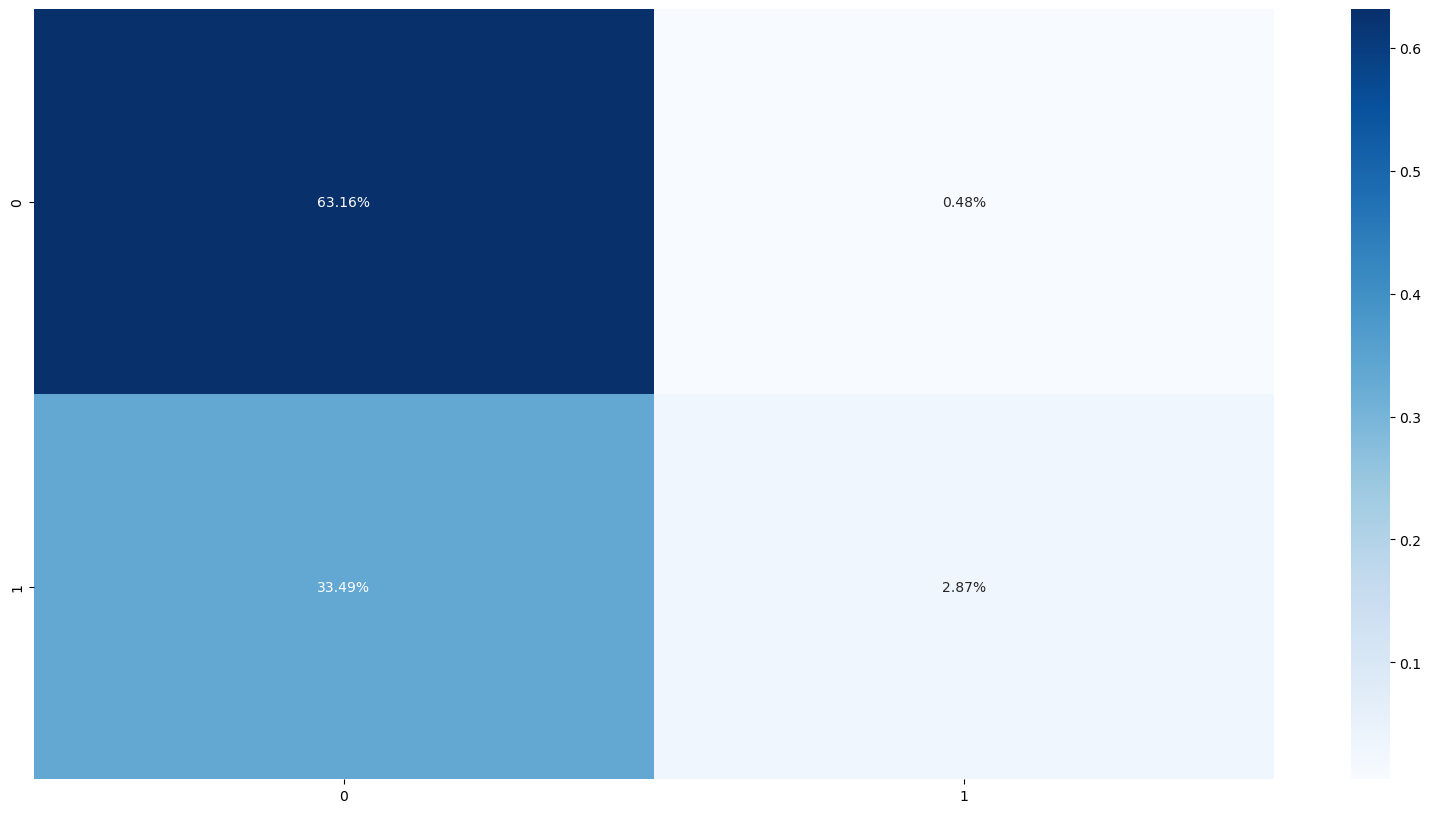

In [61]:
cm6 = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [29]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

#object og lr
model_lr = LogisticRegression()

In [30]:
#training model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
#making predication
pred_lr = model_lr.predict(x_test)

In [32]:
#y_test = 1 , 0
pred_lr

array([-1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
        1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,
        1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
        1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1])

In [33]:
#accuracy score
lr = accuracy_score(y_test, pred_lr)
print(lr)

0.9186602870813397


In [34]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

          -1       0.97      0.90      0.93       133
           1       0.85      0.95      0.89        76

    accuracy                           0.92       209
   macro avg       0.91      0.92      0.91       209
weighted avg       0.92      0.92      0.92       209



<AxesSubplot:>

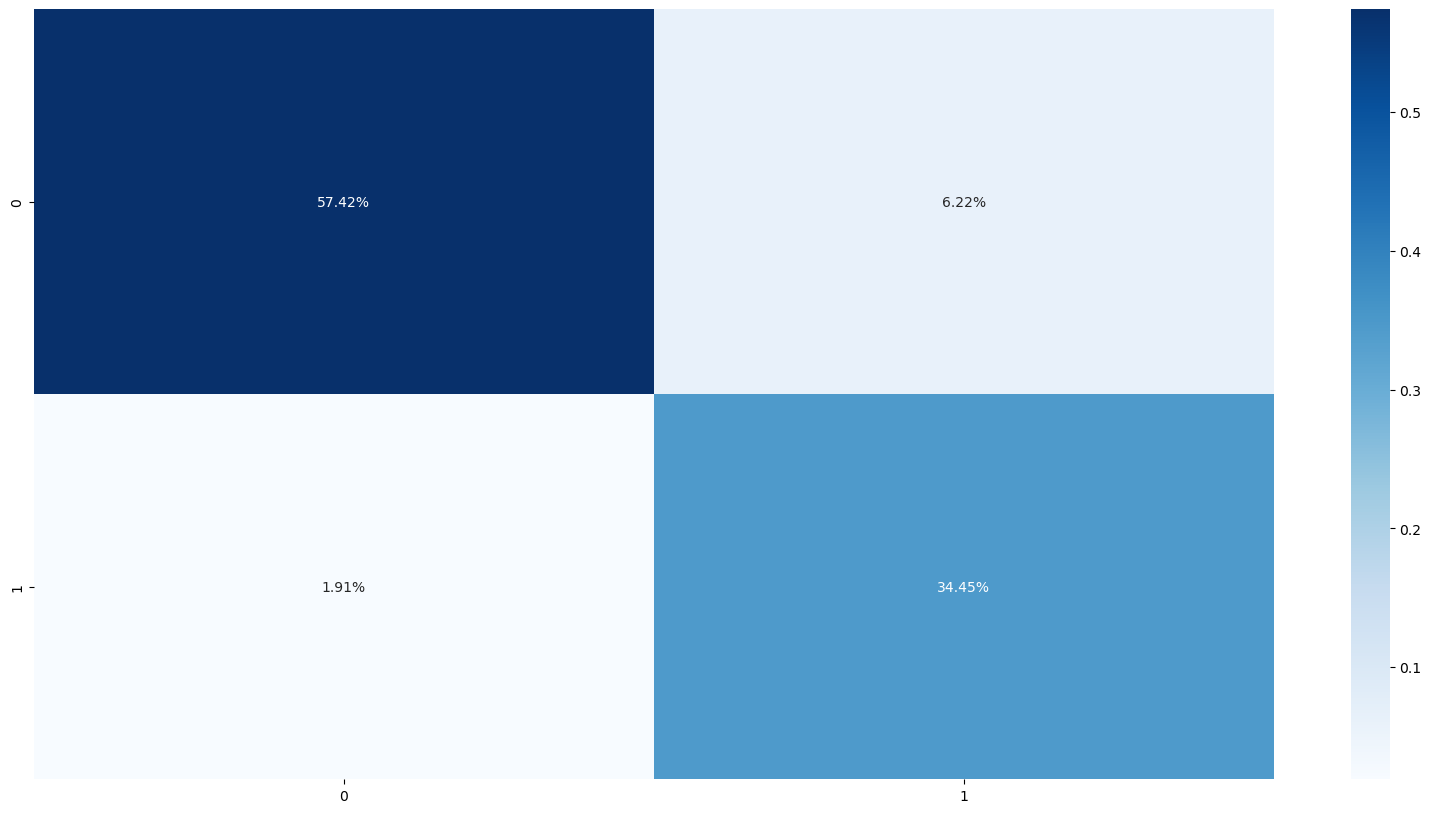

In [35]:
cm1 = confusion_matrix(y_test, pred_lr)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [36]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [37]:
# Creating model object
model_dt = DecisionTreeClassifier(max_depth=4)

In [38]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
# Making Prediction
pred_dt = model_dt.predict(x_test)

In [40]:
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.9138755980861244


In [41]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

          -1       0.92      0.95      0.93       133
           1       0.90      0.86      0.88        76

    accuracy                           0.91       209
   macro avg       0.91      0.90      0.91       209
weighted avg       0.91      0.91      0.91       209



<AxesSubplot:>

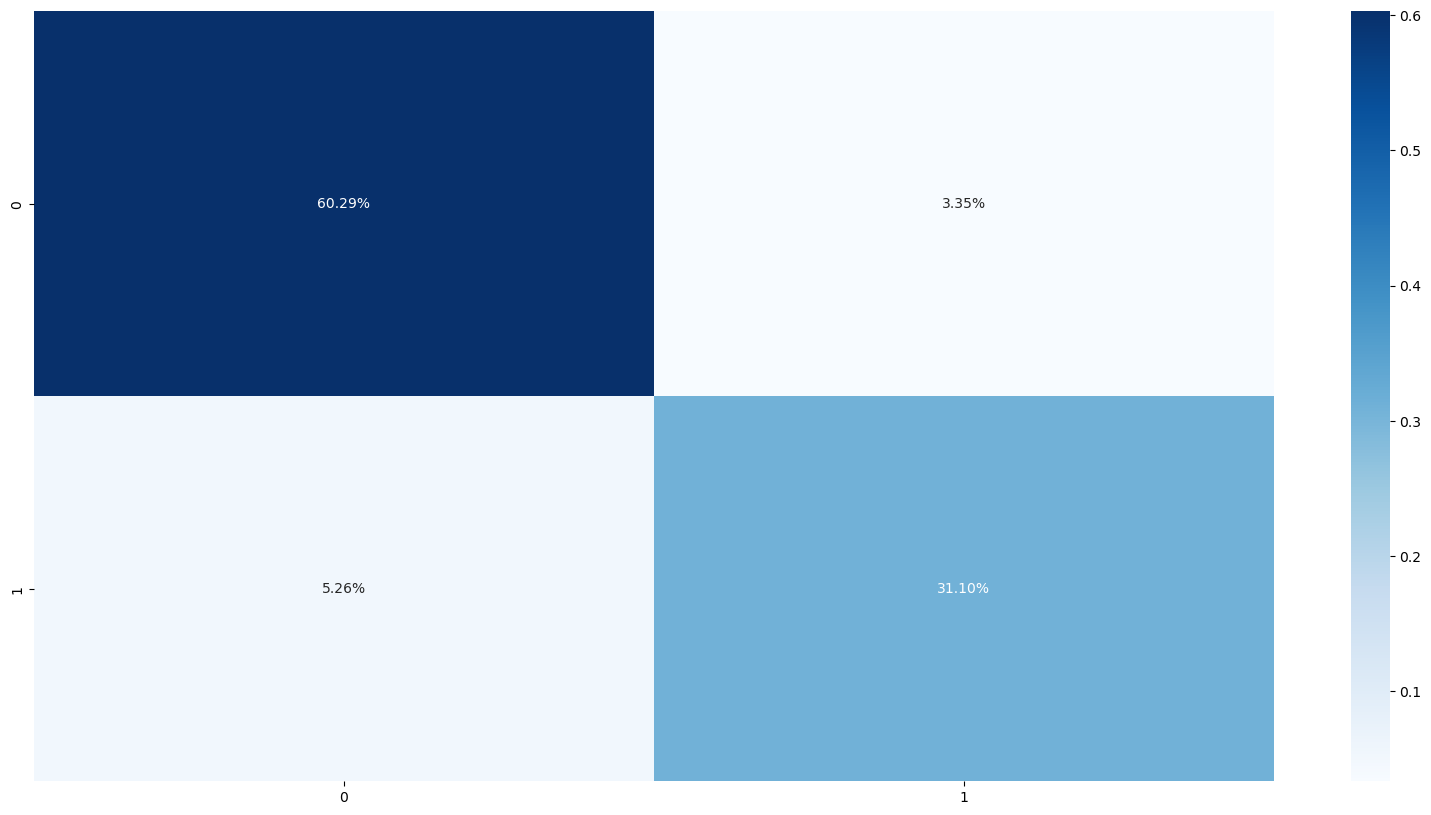

In [42]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [43]:
#RF
from sklearn.ensemble import RandomForestClassifier


In [44]:
# Creating model object
model_rf = RandomForestClassifier()

In [45]:
# Training Model
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
# Making Prediction
pred_rf = model_rf.predict(x_test)

In [47]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf * 100)

92.34449760765551


In [48]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       133
           1       0.89      0.89      0.89        76

    accuracy                           0.92       209
   macro avg       0.92      0.92      0.92       209
weighted avg       0.92      0.92      0.92       209



<AxesSubplot:>

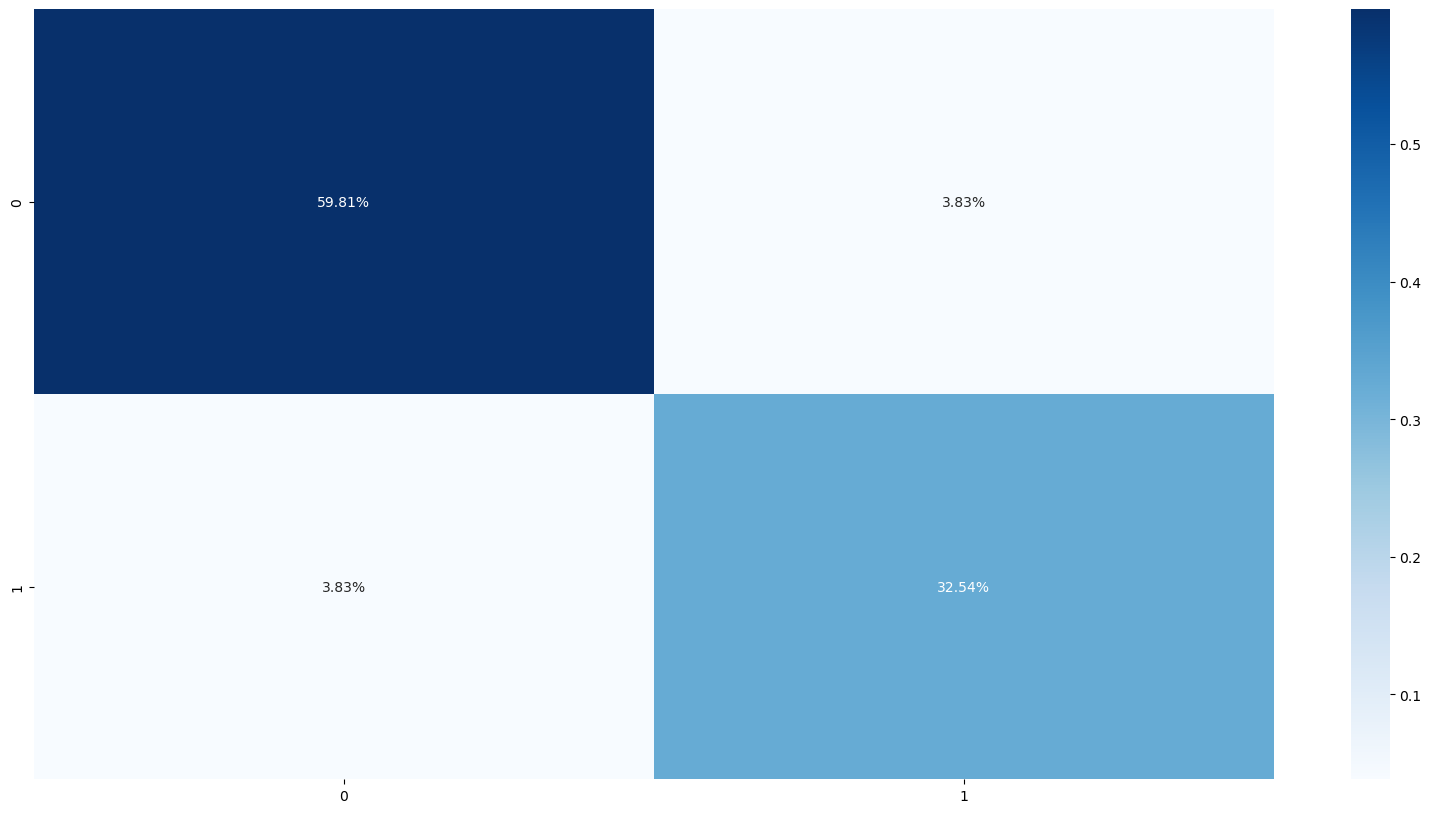

In [49]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [50]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=11, leaf_size=20)

In [52]:
# Training Model
model_kn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=11)

In [53]:
# Making Prediction
pred_kn = model_kn.predict(x_test)

In [54]:
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.937799043062201


In [55]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       133
           1       0.92      0.91      0.91        76

    accuracy                           0.94       209
   macro avg       0.93      0.93      0.93       209
weighted avg       0.94      0.94      0.94       209



<AxesSubplot:>

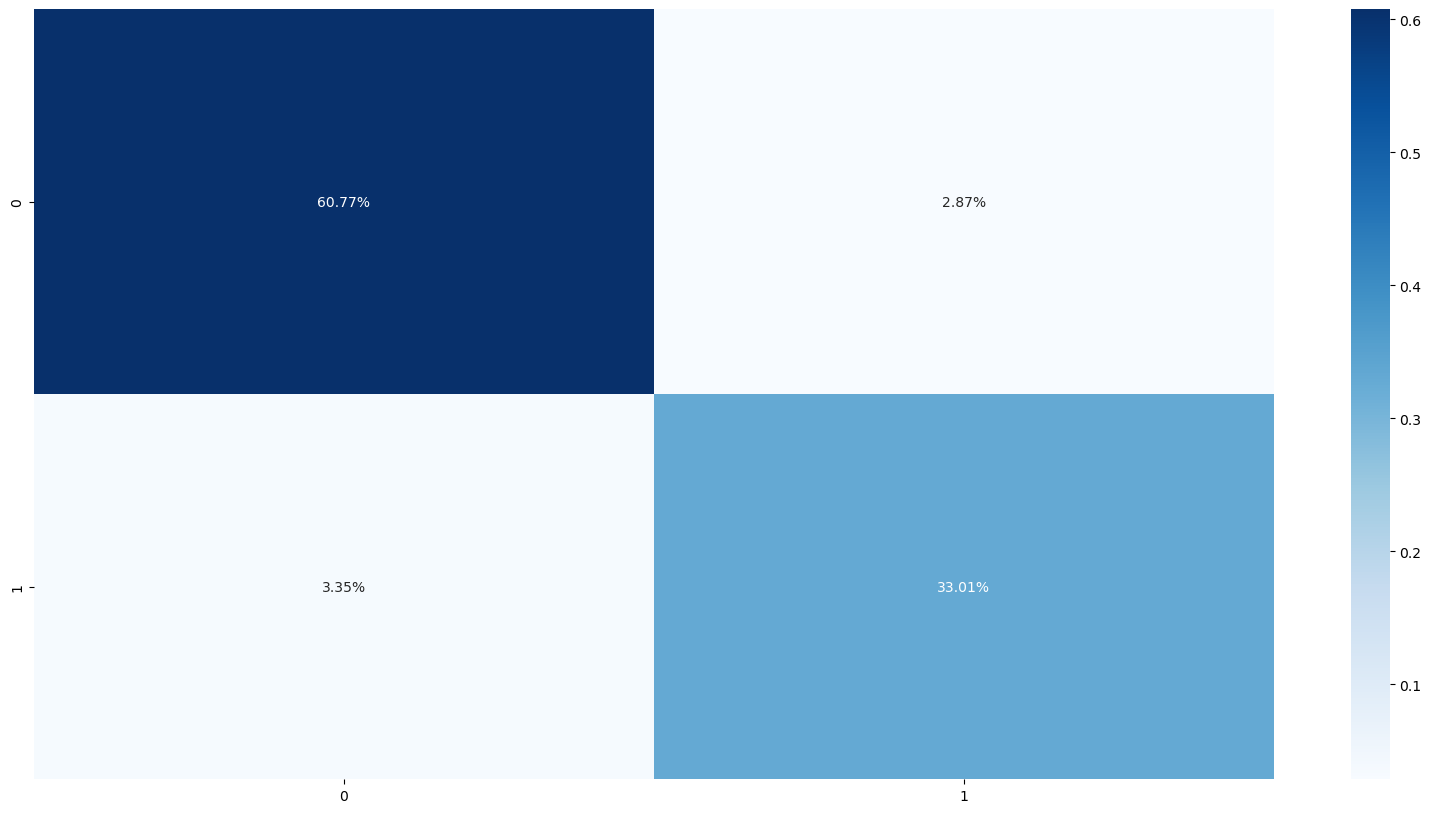

In [56]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [57]:
#SVM
from sklearn.svm import SVC

#creating object of model
model_svm = SVC(kernel="rbf")

In [58]:
#training model
#model_svm.fit(x_train, y_train)

In [59]:
# Making Prediction
#pred_svm = model_svm.predict(x_test)

In [62]:
# Calculating Accuracy Score
#svm = accuracy_score(y_test, pred_svm)
#print(svm)

In [65]:
#print(classification_report(y_test,pred_kn))

In [66]:
# confusion Maxtrix
#cm6 = confusion_matrix(y_test, pred_svm)
#sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [67]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [68]:
#making object of model
model_ada = AdaBoostClassifier(learning_rate= 0.03,n_estimators= 200)

In [69]:
#training model
model_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.03, n_estimators=200)

In [70]:
# Making Prediction
pred_ada = model_ada.predict(x_test)

In [71]:
# Calculating Accuracy Score
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.9234449760765551


In [72]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       133
           1       0.88      0.91      0.90        76

    accuracy                           0.92       209
   macro avg       0.92      0.92      0.92       209
weighted avg       0.92      0.92      0.92       209



<AxesSubplot:>

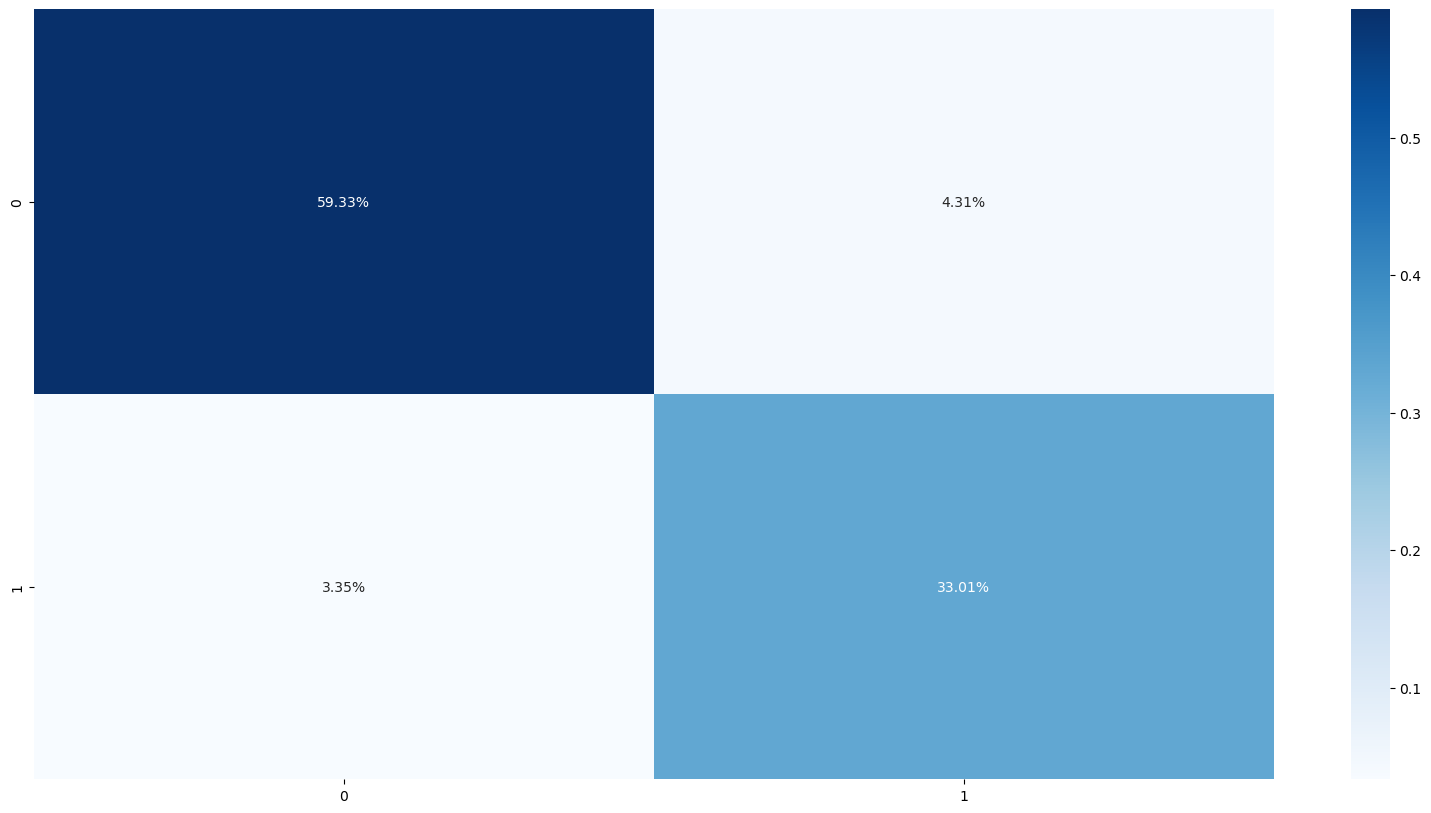

In [73]:
# confusion Maxtrix
cm7 = confusion_matrix(y_test, pred_ada)
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Blues')

In [74]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Decision Tree",
              "Random Forest",
              "KNN",
              "SVM",
              "AdaBoost"] ,
    
    "Accuracy_score": [lr,dt,rf,kn,svm_acc,ada]
})

In [75]:
models

Model  Accuracy_score
0  Logistic Regression        0.918660
1        Decision Tree        0.913876
2        Random Forest        0.923445
3                  KNN        0.937799
4                  SVM        0.660287
5             AdaBoost        0.923445

Model  Accuracy_score
3                  KNN        0.937799
2        Random Forest        0.923445
5             AdaBoost        0.923445
0  Logistic Regression        0.918660
1        Decision Tree        0.913876
4                  SVM        0.660287

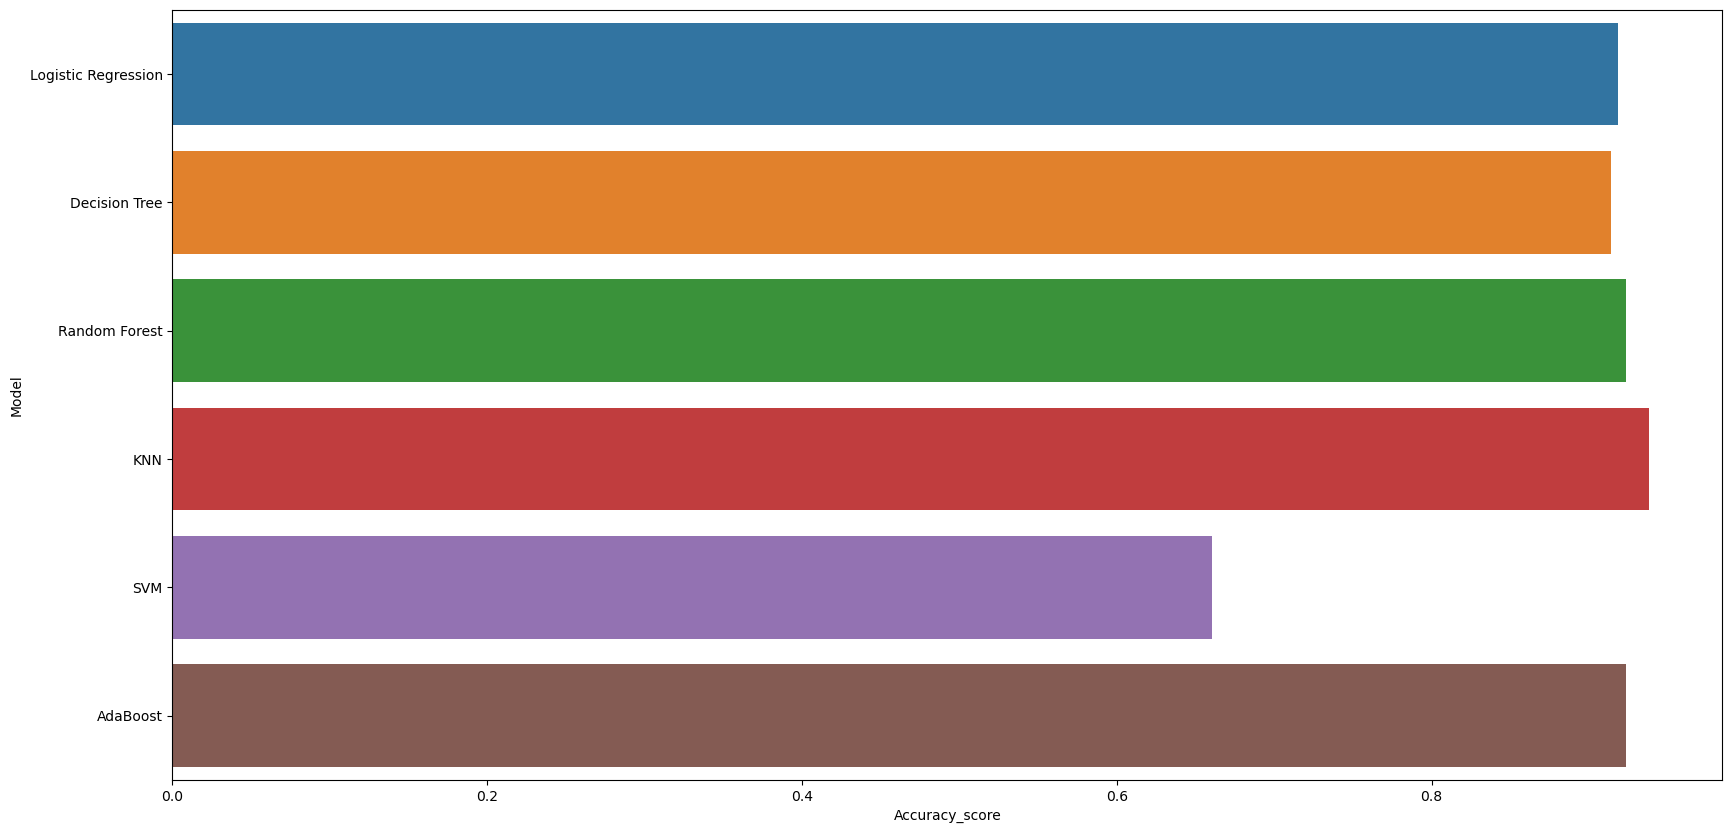

In [76]:
sns.barplot(x="Accuracy_score", y="Model", data=models)

models.sort_values(by='Accuracy_score', ascending=False)

In [87]:
#s_model= SVC(kernel='linear', random_state=42)
#s_model = SVC(probability=True)
#s_model.fit(x_train, y_train)

In [88]:
##sv = SVC(kernel='linear')
#sv.fit(x_train, y_train)

In [89]:
#y_pred = s_model.predict(x_test)
#accuracy = accuracy_score(y_test, y_pred)

In [90]:
#plt.figure(figsize=(8, 6))
#y_pred_prob = s_model.predict_proba(x_test)[:, 1]
#fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
#auc = roc_auc_score(y_test, y_pred_prob)
#plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.2f})')
#plt.plot([0, 1], [0, 1], 'k--')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve (SVM)')
#plt.legend()
#plt.show()

In [91]:
#from lightgbm import LGBMClassifier

In [92]:
#lgb = LGBMClassifier()
#lgb.fit(x,y)

In [93]:
new_data = pd.DataFrame({ 'Temperature':90 ,'pH': 9, 'Dissolved Oxygen':93, 'Conductivity':92 , 'Bio Chemical Oxygen Demand': 20, 'Nitrate':100, 'Faecal Coliform':903,'Total Coliform': 233},index=[0])

In [94]:
new_data

Temperature  pH  Dissolved Oxygen  Conductivity  \
0           90   9                93            92   

   Bio Chemical Oxygen Demand  Nitrate  Faecal Coliform  Total Coliform  
0                          20      100              903             233

In [84]:
p = model_kn.predict(new_data)
if p[0]==1:
    print("Water Could be Purified")
else:
    print("Water Could not be Purified")

Water Could not be Purified


In [85]:
import joblib
joblib.dump(model_kn,'model_joblib_water')

['model_joblib_water']

In [86]:
from tkinter import *
import joblib
from PIL import ImageTk, Image
import numpy as np
from sklearn import *

master = Tk()
master.title("Water Detection System")
master.geometry('800x640')
master.configure(bg='black')


def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    joblib.dump(model_kn,'model_joblib_knnwater')
    joblib.dump(model_ada,'model_joblib_adawater')
    joblib.dump(model_lr,'model_joblib_lrwater')
    joblib.dump(model_rf,'model_joblib_rfwater')
    modkn = joblib.load('model_joblib_knnwater')
    modad = joblib.load('model_joblib_adawater')
    modlr = joblib.load('model_joblib_lrwater')
    modrf = joblib.load('model_joblib_rfwater')

    resultkn=modkn.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    resultad=modad.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    resultlr=modlr.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    resultrf=modrf.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    
    result_window = Toplevel(master)
    result_window.title("Results")
    result_window.geometry("840x600")
    result_window.configure(bg='black')
    
    if resultkn == 1:
        Label(result_window, text="Water Could be Purified according to KNN", font=("Arial", 25), bg = "black", fg = "Light green").grid(row=31,sticky="S")
        knn=1
    else:
        Label(result_window, text="Water Could not be Purified according to KNN", font=("Arial", 25), bg = "black", fg = "Red").grid(row=31,sticky="S")
        knn=0
        
    if resultad == 1:
        Label(result_window, text="Water Could be Purified according to ADABoost", font=("Arial", 25), bg = "black", fg = "Light green").grid(row=32,sticky="S")
        ad=1
    else:
        Label(result_window, text="Water Could not be Purified according to ADABoost", font=("Arial", 25), bg = "black", fg = "Red").grid(row=32,sticky="S")
        ad=0
        
    if resultlr == 1:
        Label(result_window, text="Water Could be Purified according to Logistic Regression", font=("Arial", 25), bg = "black", fg = "Light green").grid(row=33,sticky="S")
        lr=1
    else:
        Label(result_window, text="Water Could not be Purified  to Logistic Regression", font=("Arial", 25), bg = "black", fg = "Red").grid(row=33,sticky="S")
        lr=0
        
    if resultrf == 1:
        Label(result_window, text="Water Could be Purified according to Random forest", font=("Arial", 25), bg = "black", fg = "Light green").grid(row=34,sticky="S")
        rf=1
    else:
        Label(result_window, text="Water Could not be Purified according to Random forest", font=("Arial", 25), bg = "black", fg = "Red").grid(row=34,sticky="S")
        rf=0
    aver=(rf+knn+ad+lr)/0.04
    aver_label = Label(result_window, font=("Arial", 25), bg="black", fg="white")
    aver_label.config(text=f"The Percentage Water Could be Purified is : {aver}")
    aver_label.grid(row=38, sticky="S")
    if aver >= 75:
        image = Image.open("good_image.jpg")
    elif aver < 74 and aver >= 50:
        image = Image.open("okay_image.jpg")
    else:
        image = Image.open("bad_image.jpg")
    image = image.resize((250, 250), Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image)
    image_label = Label(result_window, image=photo)
    image_label.image = photo  # This line is required to prevent the image from being garbage collected
    image_label.grid(row=35, column=0, columnspan=4)

    

label = Label(master, text = "Water Purification Predeiction System"
                          , bg = "black", fg = "white", font=("Arial", 35)). \
                               grid(row=0,columnspan=2)
Label(master, text="Enter Temperature", font=("Arial", 15), bg = "black", fg = "white").grid(row=1 ,sticky="W")
Label(master, text="        ", bg="black").grid(row=2)
Label(master, text="pH [0 to 14]", font=("Arial", 15), bg = "black", fg = "white").grid(sticky="W",row=3)
Label(master, text="        ", bg="black").grid(row=4)
Label(master, text="Enter Value of Dissolved Oxygen", font=("Arial", 15), bg = "black", fg = "white").grid(sticky="W",row=5)
Label(master, text="        ", bg="black").grid(row=6)
Label(master, text="Enter Value of Conductivity", font=("Arial", 15), bg = "black", fg = "white").grid(sticky="W",row=7)
Label(master, text="        ", bg="black").grid(row=8)
Label(master, text="Enter Value of Bio Chemical Oxygen Demand", font=("Arial", 15), bg = "black", fg = "white").grid(sticky="W",row=9)
Label(master, text="        ", bg="black").grid(row=10)
Label(master, text="Enter Value of Nitrate", font=("Arial", 15), bg = "black", fg = "white").grid(sticky="W",row=11)
Label(master, text="        ", bg="black").grid(row=12)
Label(master, text="Enter Value of Faecal Coliform", font=("Arial", 15), bg = "black", fg = "white").grid(sticky="W",row=13)
Label(master, text="        ", bg="black").grid(row=14)
Label(master, text="Enter Value of Total Coliform", font=("Arial", 15), bg = "black", fg = "white").grid(sticky="W",row=15)

e1 = Entry(master, font=('Arial 15'))
e2 = Entry(master, font=('Arial 15'))
e3 = Entry(master, font=('Arial 15'))
e4 = Entry(master, font=('Arial 15'))
e5 = Entry(master, font=('Arial 15'))
e6 = Entry(master, font=('Arial 15'))
e7 = Entry(master, font=('Arial 15'))
e8 = Entry(master, font=('Arial 15'))

e1.grid(row=1,sticky="E", column=1)
Label(master, text="        ", bg="black").grid(row=2)
e2.grid(row=3,sticky="E", column=1)
Label(master, text="        ", bg="black").grid(row=4)
e3.grid(row=5,sticky="E", column=1)
Label(master, text="        ", bg="black").grid(row=6)
e4.grid(row=7,sticky="E", column=1)
Label(master, text="        ", bg="black").grid(row=8)
e5.grid(row=9,sticky="E", column=1)
Label(master, text="        ", bg="black").grid(row=10)
e6.grid(row=11,sticky="E", column=1)
Label(master, text="        ", bg="black").grid(row=12)
e7.grid(row=13,sticky="E", column=1)
Label(master, text="        ", bg="black").grid(row=14)
e8.grid(row=15,sticky="E", column=1)

Button(master, text='Detect', font=("Arial", 25), command=show_entry_fields).grid(row=18 , sticky="E")

mainloop()
